In [1]:
import os
import tensorflow as tf
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
import pickle
import sklearn

Using TensorFlow backend.


In [2]:
pickle_files = ['open_eyes.pickle', 'closed_eyes.pickle']
i = 0
for pickle_file in pickle_files:
    with open(pickle_file, 'rb') as f:
        save = pickle.load(f)
        if i == 0:
            train_dataset = save['train_dataset']
            train_labels = save['train_labels']
            test_dataset = save['test_dataset']
            test_labels = save['test_labels']
        else:
            print("here")
            train_dataset = np.concatenate((train_dataset, save['train_dataset']))
            train_labels = np.concatenate((train_labels, save['train_labels']))
            test_dataset = np.concatenate((test_dataset, save['test_dataset']))
            test_labels = np.concatenate((test_labels, save['test_labels']))
        del save  # hint to help gc free up memory
    i += 1

print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

here
Training set (3876, 24, 24, 1) (3876, 1)
Test set (970, 24, 24, 1) (970, 1)


In [3]:
X_train = train_dataset

Y_train = train_labels

X_test = test_dataset

Y_test = test_labels


In [4]:
l=[]
for i in range(len(X_train)):
  l.append([X_train[i],Y_train[i]])
len(l)


3876

In [5]:
l=sklearn.utils.shuffle(l)

In [6]:
len(l)

3876

In [7]:
img=[]
lab=[]
for i in l:
  img.append(i[0])
  lab.append(i[1])
len(img)


3876

In [8]:
X_train=np.array(img)
Y_train=np.array(lab)

In [9]:
X_train.shape

(3876, 24, 24, 1)

In [10]:
Y_train.shape

(3876, 1)

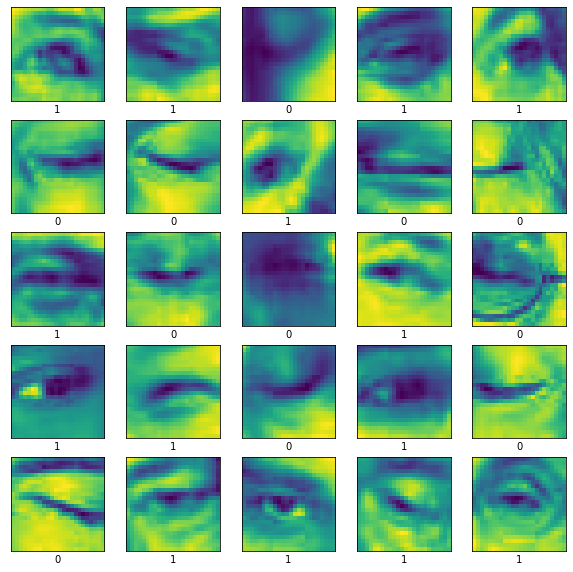

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i%25+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow((tf.squeeze(X_train[i])))
  plt.xlabel(Y_train[i][0])
plt.show()


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


In [13]:

# model = Sequential([
#     Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
#     MaxPooling2D((1,1)),
#     Conv2D(64,(3,3),activation='relu'),
#     MaxPooling2D((1,1)),#32 convolution filters used each of size 3x3
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(1),    
#     Dropout(0.25),#randomly turn neurons on and off to improve convergence
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(1, activation="sigmoid") #output a sigmoid to squash the matrix into output probabilities
# ])

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)       

In [36]:
model.predict(X_test)[0].shape

(1,)

In [15]:
model.fit(X_train,Y_train,
          epochs=10,
          validation_data=(X_test,Y_test)
          )

Train on 3876 samples, validate on 970 samples
Epoch 1/10
3876/3876 [==============================] - 32s 8ms/step - loss: 0.4165 - accuracy: 0.8088 - val_loss: 0.2502 - val_accuracy: 0.9155
Epoch 2/10
3876/3876 [==============================] - 33s 8ms/step - loss: 0.2250 - accuracy: 0.9128 - val_loss: 0.2025 - val_accuracy: 0.9320
Epoch 3/10
3876/3876 [==============================] - 37s 9ms/step - loss: 0.1704 - accuracy: 0.9363 - val_loss: 0.1464 - val_accuracy: 0.9443
Epoch 4/10
3876/3876 [==============================] - 34s 9ms/step - loss: 0.1382 - accuracy: 0.9476 - val_loss: 0.1505 - val_accuracy: 0.9340
Epoch 5/10
3876/3876 [==============================] - 30s 8ms/step - loss: 0.1223 - accuracy: 0.9559 - val_loss: 0.1306 - val_accuracy: 0.9433
Epoch 6/10
3876/3876 [==============================] - 29s 7ms/step - loss: 0.1109 - accuracy: 0.9556 - val_loss: 0.1187 - val_accuracy: 0.9474
Epoch 7/10
3876/3876 [==============================] - 30s 8ms/step - loss: 0.1047

In [16]:
pred=model.predict(X_test)
print(pred[0])
print(pred[-1])


[0.9608766]
[0.00135968]


In [17]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [18]:
Y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [19]:
pred=model.predict_classes(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,Y_test)

0.9536082474226805

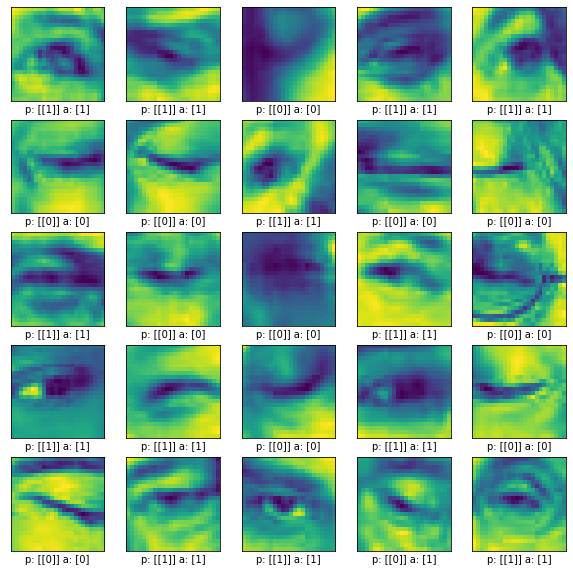

In [20]:
plt.figure(figsize=(10,10))
for i in range(0,25):
  plt.subplot(5,5,i%25+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow((tf.squeeze(X_train[i])))
  x = image.img_to_array(X_train[i])
  x = np.expand_dims(x,axis = 0)
  c = model.predict_classes(x)
  s="p: {} a: {}".format(c,Y_train[i])
  plt.xlabel(s)

In [21]:
model.save("drowsinessfinalfresh.h5")